# Autoencoders for image compression
## Lab from the 25/10/2021

---
### *Cyprien Gille*

---

### Building the encoder
We're going to use the MNIST dataset where the size of each image is 28x28. 
We set the shape to (784) rather than (28, 28) because we're going to use only dense layers in the network and thus the input must be in the form of a vector, not a matrix.
We are gonna implement a model containing the following layers:

*   `Dense` layer with 300 neurons
*   `LeakyReLU` layer
*   `Dense` layer with 2 neurons
*   `LeakyReLU` layer

In [1]:
import tensorflow.keras.layers
import tensorflow.keras.models

x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_2")(encoder_dense_layer2)

Build the encoder model

In [2]:
encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")

We can print a summary of the encoder's architecture:

In [3]:
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 300)               235500    
_________________________________________________________________
encoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 2)                 602       
_________________________________________________________________
encoder_leakyrelu_2 (LeakyRe (None, 2)                 0         
Total params: 236,102
Trainable params: 236,102
Non-trainable params: 0
_________________________________________________________________


### Building the decoder
Because the input layer of the decoder accepts the output returned from the last layer in the encoder, we have to make sure these 2 layers match in the size. The last layer in the encoder returns a vector of 2 elements and thus the input of the decoder must have 2 neurons. You can easily note that the layers of the decoder are just reflection to those in the encoder.

After the input layer, our decoder model should contain the following layers:
*   `Dense` layer with 300 neurons
*   `LeakyReLU` layer
*   `Dense` layer with 784 neurons
*   `LeakyReLU` layer

In [4]:
decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(decoder_dense_layer2)


Build de decoder model

In [5]:
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
decoder_dense_1 (Dense)      (None, 300)               900       
_________________________________________________________________
decoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
decoder_dense_2 (Dense)      (None, 784)               235984    
_________________________________________________________________
decoder_leakyrelu_2 (LeakyRe (None, 784)               0         
Total params: 236,884
Trainable params: 236,884
Non-trainable params: 0
_________________________________________________________________


### Build the complete autoencoder
The tensor named `ae_input` represents the input layer that accepts a vector of length 784. This tensor is fed to the encoder model as an input. The output from the encoder is saved in `ae_encoder_output` which is then fed to the decoder. Finally, the output of the autoencoder is saved in `ae_decoder_output`.

In [6]:
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)

In [7]:
ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

Model: "AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AE_input (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
encoder_model (Functional)   (None, 2)                 236102    
_________________________________________________________________
decoder_model (Functional)   (None, 784)               236884    
Total params: 472,986
Trainable params: 472,986
Non-trainable params: 0
_________________________________________________________________


### Compile autoencoder model.
We want to use the mean square error as loss function and Adam optimizer with learning rate set to 0.0005. For that we will use the `compile()` method.

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
ae.compile(optimizer=Adam(5e-3), loss=MeanSquaredError())

### Load Dataset
We are going to use the MNIST dataset that can be loaded from the datasets Keras API. The dataset is loaded as NumPy arrays representing the training data, test data, train labels, and test labels. Note that we are not interested in using the class labels at all while training the model but they are just used to display the results. \\
Because our model accepts the images as vectors of length 784, we must reshape the the images from the dataset into 1D vectors.

In [9]:
import tensorflow.keras.datasets
import numpy

(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

11501568/11490434 [==============================] - 0s 0us/step


### Train the autoencoder

In [10]:
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 4s 6ms/step - loss: 0.0568 - val_loss: 0.0512
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0498 - val_loss: 0.0487
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0482 - val_loss: 0.0479
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0473 - val_loss: 0.0470
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0467 - val_loss: 0.0462
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0460 - val_loss: 0.0461
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0456 - val_loss: 0.0453
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0452 - val_loss: 0.0453
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0449 - val_loss: 0.0450
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0447 - val_loss: 0.0443

### Make predictions
The `predict()` method is used in the next code to return the outputs of both the encoder and decoder models. The `encoded_images` NumPy array holds the reshaped 1D vectors representing all training images obtained from the MNIST dataset. The decoder model accepts the output of the encoder to reconstruct the original images.

In [11]:
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

As we can see below, the variable `encoded_images` contains a compressed representation of each sample. While input images were represented as a 1D vector of length 784, each sample is represented after compression by a 1D vector of length 2.

In [12]:
encoded_images[1].size

2

After decoding, vectors show a length of 784 again.

In [13]:
decoded_images[1].size

784

Finally, we need to reshape the output vectors to get an estimation of the initial data

In [14]:
decoded_images_orig = numpy.reshape(decoded_images, (x_test_orig.shape))

We can display the original and reconstructed images of 5 random samples

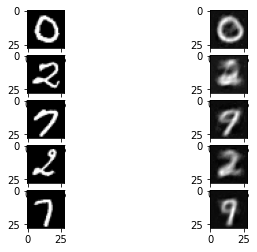

In [15]:
import matplotlib.pyplot as plt

num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_test.shape[0])
    plt.subplot(num_images_to_show, 2, plot_ind)
    plt.imshow(x_test_orig[rand_ind, :, :], cmap="gray")
    plt.subplot(num_images_to_show, 2, plot_ind+1)
    plt.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

### Testing different rates of compression

In [16]:
# To make testing easier, we put the model building and training processes in a function

def trainAE(latent_dim:int = 2):

  e_input = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")
  e_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(e_input)
  e_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(e_dense_layer1)
  e_dense_layer2 = tensorflow.keras.layers.Dense(units=latent_dim, name="encoder_dense_2")(e_activ_layer1)
  e_output = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_2")(e_dense_layer2)
  encoder = tensorflow.keras.models.Model(e_input, e_output, name="encoder_model")
  
  d_input = tensorflow.keras.layers.Input(shape=(latent_dim), name="decoder_input")
  d_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(d_input)
  d_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(d_dense_layer1)
  d_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(d_activ_layer1)
  d_output = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(d_dense_layer2)
  decoder = tensorflow.keras.models.Model(d_input, d_output, name="decoder_model")

  ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
  ae_output = decoder(encoder(ae_input))
  ae = tensorflow.keras.models.Model(ae_input, ae_output, name="AE")

  ae.compile(optimizer=Adam(5e-4), loss=MeanSquaredError())
  ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test), verbose=0)

  return ae, encoder, decoder


In [17]:
from numpy import log10

# Testing different encoding rates
rates = [1, 2, 3, 4, 6, 8, 16, 32] # Note that 8, 16 and 32 would not be smart choices if we are trying to do compression here

model_list = []
e_list = []
d_list = []

preds_list = []
psnr_list = []
mse = MeanSquaredError()
for r in rates:
  print(f"Training model with latent space of dimension {r}")
  
  ae, encoder, decoder = trainAE(r)
  model_list.append(ae)
  e_list.append(encoder)
  d_list.append(decoder)

  x_pred = ae(x_test)
  preds_list.append(x_pred)

  err = mse(x_test, x_pred).numpy()
  psnr = 10 * log10(65025/err) 
  psnr_list.append(psnr)

Training model with latent space of dimension 1
Training model with latent space of dimension 2
Training model with latent space of dimension 3
Training model with latent space of dimension 4
Training model with latent space of dimension 6
Training model with latent space of dimension 8
Training model with latent space of dimension 16
Training model with latent space of dimension 32


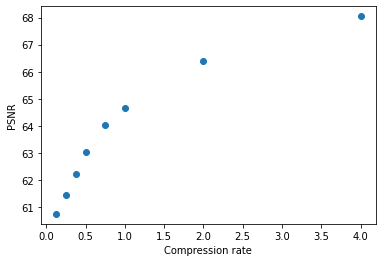

In [46]:
from numpy import array

plt.scatter(array(rates)/8, psnr_list) # Note: rates are divided by the original number of bits per pixel, 8
plt.xlabel("Compression rate")
plt.ylabel("PSNR")
plt.show()

- We can see that the PSNR increases along with the dimension of the latent space. This is an expected result, as the latent space becomes able to encode more information the higher dimension it has. 

- An interesting point however, is to note that even with a latent dimension higher than the one of the 8-bit space the original pixels resided in, the error (albeit small) remains, and seems to reach a limit. (or else the PSNR would diverge to infinity as the MSE got closer to 0).

### Entropy

In [42]:
from numpy import log2, histogram, sum
from numpy.linalg import norm


def getEntropies(pred, r, n_levels:int = 500):
  """Get the entropies of the features of the latent space"""
  ent = []
  for i in range(r):
    P, _ = histogram(pred[:,i], bins=10, density=True) # pis
    ent.append(-1 * sum(P * log2(P))) # shannon entropy
  return ent

  
entropies = []

for i, enc in enumerate(e_list): # for each encoder trained previously
  r = rates[i]
  pred = enc.predict(x_test) # predict using the trained encoder of latent dimension r  
  entropies.append(sum(getEntropies(pred, r))) # compute the total entropy of all the features of the latent space

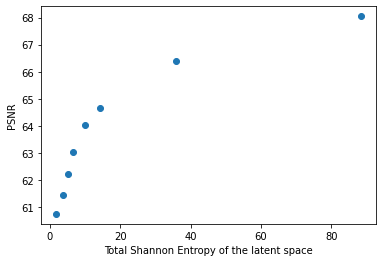

In [44]:
plt.scatter(entropies, psnr_list)
plt.xlabel("Total Shannon Entropy of the latent space")
plt.ylabel("PSNR")
plt.show()

- We can see that the PSNR increases along with the entropy of the latent space. This is also an expected result, for the same reason quoted before: the latent space has higher entropy intuitively means that it contains more information. Thus, it can encode more data and provide for a better decoding, making the PSNR higher. Once again, we can see that the MSE still doesn't seem to go to 0 (which would make the PSNR infinite) even with high latent space entropies. 